# Trafico del estado de California





## Introduccion

Los datos y la información han tomado un papel de vital importancia para casi todos los aspectos de nuestra vida diaria, desde el clima hasta el tráfico, lo que ha significado un incremento exponencial en la cantidad de información que se almacena respecto de las actividades cotidianas que realizamos diariamente.
Derivado de los anterior se genera un nuevo concepto denominado como Big Data, el cual responde a datos que son lo bastante variados, grandes y generados con gran rapidez y de diferentes fuentes, como para ser procesados por métodos convencionales y se define con 3 características destacadas: Volumen, variedad y velocidad, las 3V.
Este termino no solo está asociado a los datos que cumplen las características 3V, también hace referencia las metodologías utilizadas para el procesamiento y análisis de los datos que cumplen estas condiciones

Éste trabajo hará uso de modelos estadísticos, aplicados sobre datos de accidentes de tráfico en California correspondientes al periodo de 2000 a 2020, con el fin de dar cumplimiento al objetivo planteado e igualmente dar respuesta a las preguntas planteadas por los especialistas, esto como una pequeña muestra de la aplicación práctica del Big Data y sus usos.



## Pregunta

El presente trabajo espera dar respuesta a las siguientes preguntas, como resultado del procesamiento y análisis de la base de datos:

•	¿Cómo determinar el número de accidentes diarios en el estado de California?

Para entender los datos se realizará un análisis exploratorio univariado, para posteriormente realizar la segmentación de la base y caracterización de las variables.

Para la segunda parte, adicional al análisis exploratorio de los datos, se plantearán y desarrollaran modelos de series de tiempo los cuales pasaran por un método de comparación para determinar el mejor modelo.


## Objetivo

- Estudiar el comportamiento de los accidentes reportados en el estado de California entre los años 2001 y 2020
-	Construir un modelo que nos permita predecir adecuadamente la ocurrencia de accidentes en el estado de California


# Cargar la Base de datos

Los datos corresponden a las colisiones reportadas en el estado de california durante los años 2001 y 2020, estos fueron tomados de Kaggle y son totalmente libres, pueden acceder a ellos a tráves del siguiente enlace [Link](https://www.kaggle.com/alexgude/california-traffic-collision-data-from-switrs).

Los datos provienen de la patrulla de caminos del estado de California y cubre las colisiones del estado, los datos estan almacenados en una base de datos SQLITE y esta compuesta por tres tablas:

- Collisions: Contiene información sobre la colisión, donde ocurrio, que vehiculos estuvieron involucrados, etc.
- Parties: Contiene información sobre los grupos de personas involucradas en la colisión, incluido la edad, el sexo y la sobriedad.
- Victims: Contiene información sobre las lesiones de personas especificas involucradas en la colisión.

Existe un diccionario de las tablas en el siguiente enlace [Link](https://tims.berkeley.edu/help/SWITRS.php).





## Curiosidades

En general la base de datos pesa aproximadamente 5,64 GB y dado que nos interesa el numero de accidentes reportados en el estado de California, solo nos enfocaremos en la tabla Collisions.

## Cargar librerias

Las siguientes librerias seran utilizadas durante la carga de los datos, limpieza y posterior analisis.

In [2]:
!pip install pandasql
!pip install mysql.connector
!pip install sqlalchemy
!pip install -q condacolab
!pip install 'fsspec>=0.3.3'

La siguiente libreria es muy importante pues permite la instalacion de Dask en Colab

In [3]:
import condacolab
condacolab.install()
#condacolab.check()

✨🍰✨ Everything looks OK!


In [4]:
!pip install dask
!pip install mysql-connector-python

In [5]:
import dask.dataframe as dd
import pandas as pd
import pandasql as ps
import numpy as np
import os 
import sqlite3
import mysql.connector
from sqlite3 import Error
from google.colab import drive
from dask import delayed
import matplotlib.pyplot as plt
import sqlalchemy
pd.options.display.float_format = '{:,.2f}'.format
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Todas las tablas de la base de datos fueron extraidas en formato CSV para ser subidas a una carpeta compartida y de esta manera poder procesar los datos. Al google drive se subieron las siguientes tablas:

- Collisions: con un total de 9.424.334 de registros y 74 columnas.
- Parties: con un total  de 18.669.166 de registros y 31 columnas.
- Victims: con un total de 9.639.334 de registros y 11 columnas.

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shareddrives/Big data/")


Mounted at /content/drive


## Conectado a SQLITE

Durante el montaje de la base en la nube, se intento realizar la conexion entre Colab directamente con la base de datos en formato SQLITE.

In [ ]:
conn = create_connection("switrs.sqlite")
#cur = conn.cursor()
#conn = sqlite3.connect("switrs.sqlite")

Connection to SQLite DB successful


In [ ]:
sql_query = pd.read_sql("select * from case_ids limit 100",conn)
# sql_query
# conn.close()

# Base Collisions

Dado el enfoque del estudio se cargaran los datos de la tabla collisions y se procede a la limpieza de datos

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shareddrives/Big data")

Mounted at /content/drive


In [8]:
%time
df=dd.read_csv('Collisions.csv',
              dtype={
               'beat_number':str,
               'city_division_lapd':str,
               'pcf_violation_code':str,
               'population': str,
               'primary_ramp' :str,
               'reporting_district':str,
               'road_condition_2':str,
               'route_suffix':str,
               'secondary_ramp':str,
               'weather_2':str,
               'special_condition':str,
               'chp_road_type':str,
               'chp_vehicle_type_at_fault':str,
               'case_id':str,
               'collision_date':str
              })
df


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
npartitions=57,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,float64,object,object,int64,object,int64,object,int64,object,object,object,object,object,object,float64,object,float64,object,object,float64,object,float64,float64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,object,object,int64,int64,int64,int64,int64,int64,int64,int64,float64,object,object,float64,float64,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
df.head()

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,0081715,"1,941.00",11342,212,5,7,1941,0,0,not chp,NaN,not chp,003,PATTERSON ST,ATLANTIC AV,0.00,NaN,1.00,cloudy,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,1.00,property damage only,0.00,0.00,2.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,0,nan,nan,nan,nan,1.00,nan,NaN,NaN,0,0,0,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2020-03-14,07:45:00,2020-06-22
1,0726202,"3,600.00",8945,064,5,5,3612,0,0,not chp,NaN,not chp,005,AMARGOSA,MARICOPA RD,0.00,NaN,nan,clear,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,1.00,property damage only,0.00,0.00,1.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,misdemeanor,hit object,fixed object,no pedestrian involved,dry,normal,NaN,dark with street lights,none,0,nan,nan,nan,nan,1.00,nan,passenger car,01,0,0,0,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2020-07-26,02:50:00,2020-09-30
2,3493128,"9,860.00",016616,NaN,2,9,3600,0,1,interstate,NaN,chp other,151,RT 15,LYTLE CREEK WASH,120.00,north,0.00,clear,NaN,1.00,SBD,8.00,15.00,NaN,NaN,13.10,highway,nan,northbound,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,NaN,improper turning,"22,107.00",NaN,not hit and run,sideswipe,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,1,nan,nan,nan,1.00,1.00,nan,other vehicle,47,0,0,0,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2008-01-02,15:15:00,2008-08-20
3,3495044,"9,540.00",17076,NaN,1,9,1900,0,1,interstate,NaN,chp other,506,RT 5,RT 126,"1,000.00",south,0.00,clear,NaN,1.00,LA,7.00,5.00,NaN,R,55.29,highway,nan,northbound,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,construction,NaN,daylight,none,1,nan,nan,nan,1.00,1.00,nan,truck or truck tractor,26,0,0,0,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2008-01-02,11:30:00,2008-11-10
4,3503560,"4,316.00",15949,52,5,6,4316,0,0,not chp,NaN,not chp,005,RT 82,MATHILDA AV,30.00,west,0.00,clear,NaN,1.00,SCL,4.00,82.00,NaN,NaN,17.03,highway,nan,northbound,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,NaN,automobile right of way,"21,804.00",A,not hit and run,broadside,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,functioning,0,nan,nan,nan,nan,1.00,nan,passenger car,07,0,0,0,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2008-01-07,08:36:00,2008-09-23


In [10]:
df.tail()

/usr/local/lib/python3.7/site-packages/dask/core.py:151: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, cache)


,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
73189,8066678,"3,022.00",1235,NORTH,5,5,3022,0,0,not chp,NaN,not chp,NaN,JAMBOREE RD,JAMBOREE RD 13321,0.00,NaN,nan,clear,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,0.00,property damage only,0.00,0.00,2.00,other improper driving,NaN,other improper driving,nan,NaN,misdemeanor,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,0,nan,nan,nan,nan,1.00,nan,pickup or panel truck,22,0,0,0,0,0,0,0,0,0.00,NaN,NaN,33.43,-117.47,2016-06-12,18:04:00,2016-06-24
73190,8071228,"4,109.00",14485,26,5,4,4109,0,0,not chp,NaN,not chp,001,MENLO AV,EVELYN,0.00,NaN,1.00,clear,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,misdemeanor,sideswipe,parked motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,0,nan,nan,nan,nan,1.00,nan,passenger car,01,0,0,0,0,0,0,0,0,0.00,NaN,NaN,37.45,-122.18,2016-05-11,10:00:00,2016-06-28
73191,8112338,"1,801.00",840,NaN,5,3,1801,0,0,not chp,NaN,not chp,NaN,N WEATHERLOW ST,RT 36,21.00,NaN,0.00,clear,NaN,1.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,0.00,pain,0.00,1.00,3.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,functioning,0,nan,nan,nan,nan,1.00,nan,NaN,NaN,0,0,1,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2016-08-15,15:31:00,2016-09-01
73192,8121975,700.00,60701,33,5,4,790,0,0,not chp,NaN,not chp,063,CAMINO TASSAJARA,OLD CAMINO TASSAJARA,20.00,east,0.00,clear,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,0.00,pain,0.00,1.00,2.00,vehicle code violation,NaN,other hazardous violation,"21,451.00",A,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,functioning,0,nan,nan,nan,nan,1.00,nan,NaN,NaN,0,0,1,0,0,0,0,0,0.00,NaN,NaN,nan,nan,2016-08-18,07:53:00,2016-09-19
73193,90219813,"9,340.00",020841,NaN,2,7,4313,0,2,safety services program,NaN,chp other,904,MCKEE ROAD,SORGEPARK PLACE,32.00,east,0.00,clear,NaN,0.00,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,1.00,pain,0.00,1.00,4.00,vehicle code violation,NaN,speeding,"22,350.00",NaN,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,0,nan,nan,nan,nan,1.00,nan,pickup or panel truck,22,0,0,1,0,0,0,0,0,0.00,NaN,NaN,37.22,-121.50,2016-06-21,15:00:00,2016-07-11


El siguiente codigo  realiza la limpieza de datos y el conteo de valores faltantes por cada columna, este proceso dada la magnitud de la tabla fue paralelizado con dask.

In [12]:
%time
dat_na=df.isnull().sum().compute()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [ ]:
print(dat_na)

case_id                     0
jurisdiction            10865
officer_id              22208
reporting_district    5418677
chp_shift                   0
                       ...   
latitude              6648754
longitude             6648753
collision_date              0
collision_time          79812
process_date                0
Length: 74, dtype: int64


Los resultados fueron exportados en formato CSV para su posterior analisis 

In [ ]:
dat_na.to_csv('collisions_na.csv') 

Las variables seleccionadas de la tabla fueron aquellas que tenian menos de un 20% de datos faltantes.

In [11]:
base_collisions=df[[
                    'case_id',
                    'jurisdiction',
                    'officer_id',
                    'chp_shift',
                    'population',
                    'county_city_location',
                    'special_condition',
                    'beat_type',
                    'chp_beat_type',
                    'chp_beat_class',
                    'beat_number',
                    'primary_road',
                    'secondary_road',
                    'distance',
                    'direction',
                    'intersection',
                    'weather_1',
                    'state_highway_indicator',
                    'tow_away',
                    'collision_severity',
                    'killed_victims',
                    'injured_victims',
                    'party_count',
                    'primary_collision_factor',
                    'pcf_violation_category',
                    'pcf_violation',
                    'hit_and_run',
                    'type_of_collision',
                    'motor_vehicle_involved_with',
                    'pedestrian_action',
                    'road_surface',
                    'road_condition_1',
                    'lighting',
                    'control_device',
                    'chp_road_type',
                    'not_private_property',
                    'statewide_vehicle_type_at_fault',
                    'severe_injury_count',
                    'other_visible_injury_count',
                    'complaint_of_pain_injury_count',
                    'pedestrian_killed_count',
                    'pedestrian_injured_count',
                    'bicyclist_killed_count',
                    'bicyclist_injured_count',
                    'motorcyclist_killed_count',
                    'motorcyclist_injured_count',
                    'collision_date',
                    'collision_time',
                    'process_date'

]]
base_collisions.columns.tolist()

['case_id',
 'jurisdiction',
 'officer_id',
 'chp_shift',
 'population',
 'county_city_location',
 'special_condition',
 'beat_type',
 'chp_beat_type',
 'chp_beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'distance',
 'direction',
 'intersection',
 'weather_1',
 'state_highway_indicator',
 'tow_away',
 'collision_severity',
 'killed_victims',
 'injured_victims',
 'party_count',
 'primary_collision_factor',
 'pcf_violation_category',
 'pcf_violation',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'road_condition_1',
 'lighting',
 'control_device',
 'chp_road_type',
 'not_private_property',
 'statewide_vehicle_type_at_fault',
 'severe_injury_count',
 'other_visible_injury_count',
 'complaint_of_pain_injury_count',
 'pedestrian_killed_count',
 'pedestrian_injured_count',
 'bicyclist_killed_count',
 'bicyclist_injured_count',
 'motorcyclist_killed_count',
 'motorcyclist_injured_count',
 'collision_date',
 'c

In [ ]:
base_collisions.head(5)
w=base_collisions.head(5)

In [ ]:
w.to_csv('collisions_muestra.csv')
base_collisions.compute().to_csv('collisions_limpia.csv') 

/usr/local/lib/python3.7/dist-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/dist-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/dist-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/dist-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [ ]:
base_collisions.collision_date.values
df=base_collisions

In [12]:
df['collision_date'].values

dask.array<values, shape=(nan,), dtype=object, chunksize=(nan,), chunktype=numpy.ndarray>

# Creacion de la base de datos

Dado que nuestro objetivo se centra en el conteo de los accidentes en el estado de California, se decidio tomar por el momento la tabal de Collisions y crear la base de datos, el objetivo en este punto llevar la tabla hasta la tercera forma normal.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

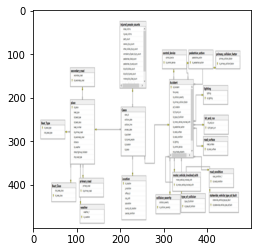

In [15]:
img = cv2.imread("Base.png")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_cvt=cv2.resize(img_cvt,(500,500))
plt.imshow(img_cvt)
plt.show()

En la anterior imagen se puede apreciar el diagrama entidad relacion del proyecto

# Analisis Univariado

En este apartado se presenta el analisis exploratorio univariado

In [15]:
#!pip install funpymodeling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import multiprocessing

In [16]:
base_collisions.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 49 entries, case_id to process_date
dtypes: object(27), float64(11), int64(11)

Se verifica el tipo de variables de la tabla

In [18]:
base_collisions.dtypes

case_id                             object
jurisdiction                       float64
officer_id                          object
chp_shift                            int64
population                          object
county_city_location                 int64
special_condition                   object
beat_type                            int64
chp_beat_type                       object
chp_beat_class                      object
beat_number                         object
primary_road                        object
secondary_road                      object
distance                           float64
direction                           object
intersection                       float64
weather_1                           object
state_highway_indicator            float64
tow_away                           float64
collision_severity                  object
killed_victims                     float64
injured_victims                    float64
party_count                        float64
primary_col

La base Collisions cuenta con 49 campos, los cuales contienen datos tipo Object(27), Float64(11) e int64(11), es decir 22 campos de tipo numérico y 27 de tipo texto. La cantidad de observaciones de la base es de 9.172.565


In [20]:
base_collisions_numericas = base_collisions[[
                    'jurisdiction',
                    'chp_shift',
                    'county_city_location',
                    'beat_type',
                    'distance',
                    'intersection',
                    'state_highway_indicator',
                    'tow_away',
                    'killed_victims',
                    'injured_victims',
                    'party_count',
                    'pcf_violation',
                    'not_private_property',
                    'severe_injury_count',
                    'other_visible_injury_count',
                    'complaint_of_pain_injury_count',
                    'pedestrian_killed_count',
                    'pedestrian_injured_count',
                    'bicyclist_killed_count',
                    'bicyclist_injured_count',
                    'motorcyclist_killed_count',
                    'motorcyclist_injured_count',
                    ]]

Se realiza una descripcion univariada de la base de datos

In [21]:
summary = base_collisions_numericas.describe().compute()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [23]:
summary

,jurisdiction,chp_shift,county_city_location,beat_type,distance,intersection,state_highway_indicator,tow_away,killed_victims,injured_victims,party_count,pcf_violation,not_private_property,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count
count,"9,161,700.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,563.00","9,079,551.00","9,170,991.00","9,115,456.00","9,170,513.00","9,170,079.00","9,172,559.00","8,539,349.00","9,172,563.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,565.00","9,172,564.00"
mean,"5,876.58",3.52,"2,788.79",0.69,677.07,0.23,0.38,0.51,0.01,0.56,1.98,"22,035.81",1.00,0.03,0.15,0.38,0.00,0.03,0.00,0.02,0.00,0.02
std,"3,501.97",1.67,"1,328.63",0.93,"12,961.50",0.42,0.48,0.50,0.10,0.89,0.68,"1,661.06",0.00,0.19,0.43,0.74,0.04,0.18,0.02,0.16,0.03,0.16
min,100.00,1.00,100.00,0.00,"-396,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"3,600.00",2.00,"1,942.00",0.00,37.00,0.00,0.00,0.00,0.00,0.00,2.00,"22,106.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"9,330.00",5.00,"3,600.00",1.00,250.00,0.00,1.00,1.00,0.00,0.00,2.00,"22,350.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"9,650.00",5.00,"4,314.00",2.00,"1,399.50",1.00,1.00,1.00,0.00,1.00,2.00,"22,350.00",1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"9,875.00",5.00,"5,802.00",4.00,"9,488,160.00",1.00,1.00,1.00,13.00,105.00,92.00,"92,350.00",1.00,28.00,41.00,73.00,10.00,64.00,2.00,11.00,4.00,9.00


##Histogramas

Se proponen unos histograma como una forma de visualizar los datos y el comportamineto de las colisiones en el estado de California

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


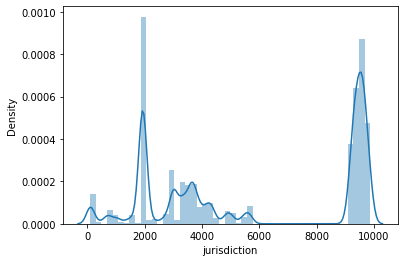

In [24]:
sns.distplot(base_collisions_numericas['jurisdiction']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


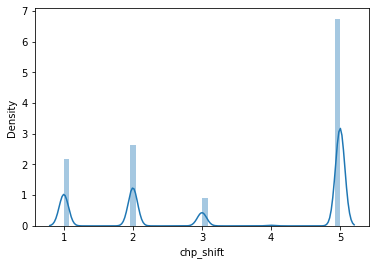

In [25]:
sns.distplot(base_collisions_numericas['chp_shift']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a 

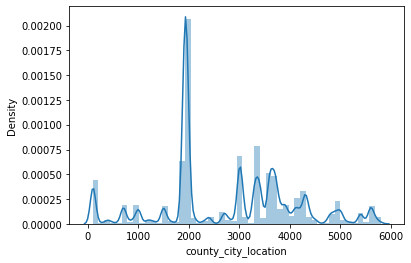

In [ ]:
sns.distplot(base_collisions_numericas['county_city_location']);

In [ ]:
sns.distplot(base_collisions_numericas['beat_type']);

In [ ]:
sns.distplot(base_collisions_numericas['distance']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a 

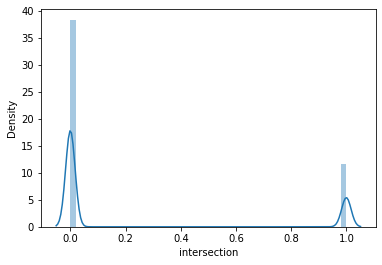

In [ ]:
sns.distplot(base_collisions_numericas['intersection']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


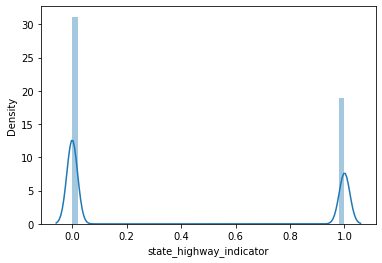

In [26]:
sns.distplot(base_collisions_numericas['state_highway_indicator']);

In [ ]:
sns.distplot(base_collisions_numericas['tow_away']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


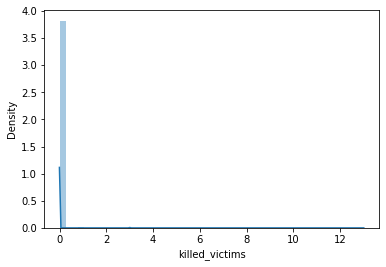

In [ ]:
sns.distplot(base_collisions_numericas['killed_victims']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


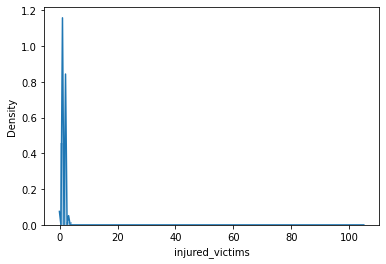

In [ ]:
sns.distplot(base_collisions_numericas['injured_victims']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a 

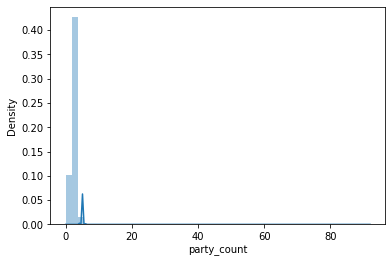

In [ ]:
sns.distplot(base_collisions_numericas['party_count']);

In [ ]:
sns.distplot(base_collisions_numericas['pcf_violation']);

In [ ]:
sns.distplot(base_collisions_numericas['not_private_property']);

In [ ]:
sns.distplot(base_collisions_numericas['severe_injury_count']);

In [ ]:
sns.distplot(base_collisions_numericas['other_visible_injury_count']);

In [ ]:
sns.distplot(base_collisions_numericas['complaint_of_pain_injury_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


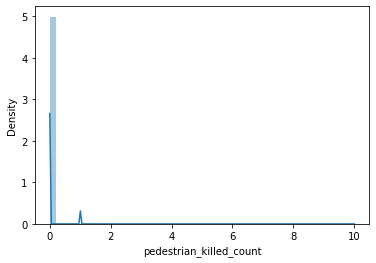

In [ ]:
sns.distplot(base_collisions_numericas['pedestrian_killed_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


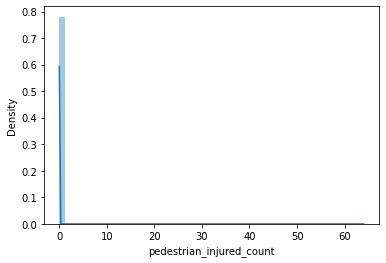

In [ ]:
sns.distplot(base_collisions_numericas['pedestrian_injured_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


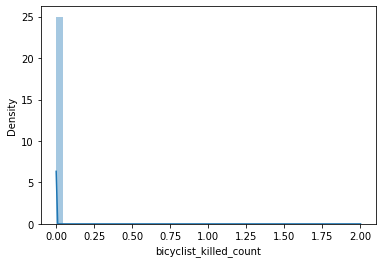

In [ ]:
sns.distplot(base_collisions_numericas['bicyclist_killed_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


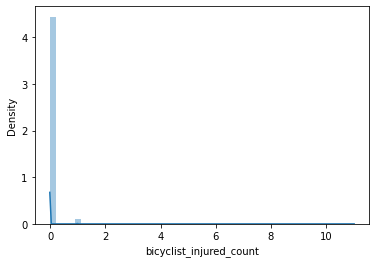

In [ ]:
sns.distplot(base_collisions_numericas['bicyclist_injured_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


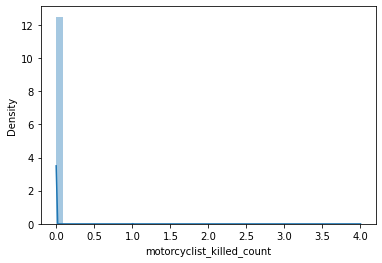

In [ ]:
sns.distplot(base_collisions_numericas['motorcyclist_killed_count']);

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


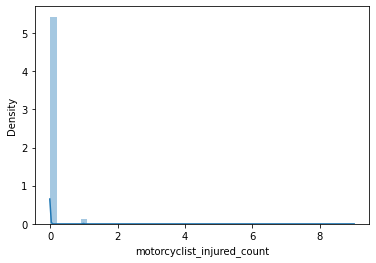

In [ ]:
sns.distplot(base_collisions_numericas['motorcyclist_injured_count']);

In [27]:
base_collisions_no_numericas = base_collisions[[
                    'case_id',
                    'officer_id',
                    'population',
                    'special_condition',
                    'chp_beat_type',
                    'chp_beat_class',
                    'beat_number',
                    'primary_road',
                    'secondary_road',
                    'direction',
                    'weather_1',
                    'collision_severity',
                    'primary_collision_factor',
                    'pcf_violation_category',
                    'hit_and_run',
                    'type_of_collision',
                    'motor_vehicle_involved_with',
                    'pedestrian_action',
                    'road_surface',
                    'road_condition_1',
                    'lighting',
                    'control_device',
                    'chp_road_type',
                    'statewide_vehicle_type_at_fault',
                    'collision_date',
                    'collision_time',
                    'process_date'
                    ]]

In [28]:
Table = base_collisions_no_numericas.describe().compute()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [ ]:
Table

,case_id,officer_id,population,special_condition,chp_beat_type,chp_beat_class,beat_number,primary_road,secondary_road,direction,weather_1,collision_severity,primary_collision_factor,pcf_violation_category,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,lighting,control_device,chp_road_type,statewide_vehicle_type_at_fault,collision_date,collision_time,process_date
unique,9172565,119840,8,2,8,3,50774,320796,490319,5,7,7,6,24,4,11,12,7,7,8,5,9,9,15,7235,1440,5308
count,9172565,9150357,9170906,8652082,9172565,9170071,8377871,9172540,9172548,6893787,9128373,9172549,9118220,9018316,9172564,9098267,9124971,9166305,9093706,9095570,9120072,9116255,9172564,7349165,9172565,9092753,9172565
top,9870011231152508671,415,7,0,not chp,not chp,002,RT 101,MAIN ST,south,clear,property damage only,vehicle code violation,speeding,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,daylight,none,0,passenger car,2002-11-08,16:00:00,2015-10-19
freq,1,5773,2281946,8615849,4948276,4948276,461735,221096,35909,1888376,7532604,5554474,8603455,2840516,7396909,3050738,6005491,8895363,8281423,8816457,6132280,6061962,7403656,5487677,2918,62102,26035


Adicionalmente se realiza un analisis de correlacion entre las variables númericas

In [29]:
corr_base_collisions = base_collisions.corr().compute()
print("La correlación entre las variables es:")
corr_base_collisions

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


La correlación entre las variables es:


,jurisdiction,chp_shift,county_city_location,beat_type,distance,intersection,state_highway_indicator,tow_away,killed_victims,injured_victims,party_count,pcf_violation,not_private_property,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count
jurisdiction,1.00,-0.92,0.22,0.77,0.04,-0.33,0.63,0.09,0.02,-0.07,-0.07,0.06,nan,0.02,-0.01,-0.09,-0.01,-0.11,-0.01,-0.10,0.01,0.03
chp_shift,-0.92,1.00,-0.01,-0.76,-0.04,0.33,-0.62,-0.06,-0.01,0.08,0.03,-0.05,nan,-0.01,0.03,0.08,0.01,0.10,0.01,0.10,-0.01,-0.03
county_city_location,0.22,-0.01,1.00,0.02,0.01,-0.00,0.02,0.05,0.01,0.01,-0.04,0.01,nan,0.01,0.02,0.00,0.00,-0.01,0.00,0.01,0.00,0.01
beat_type,0.77,-0.76,0.02,1.00,0.03,-0.20,0.17,0.05,0.02,-0.06,-0.12,0.05,nan,0.03,0.00,-0.08,-0.01,-0.07,-0.00,-0.06,0.01,0.03
distance,0.04,-0.04,0.01,0.03,1.00,-0.03,0.03,0.01,0.01,0.00,-0.02,0.00,nan,0.01,0.01,-0.01,-0.00,-0.01,-0.00,-0.01,0.01,0.01
intersection,-0.33,0.33,-0.00,-0.20,-0.03,1.00,-0.29,0.05,-0.01,0.14,0.04,-0.07,nan,0.00,0.06,0.13,-0.00,0.05,0.00,0.06,0.00,-0.01
state_highway_indicator,0.63,-0.62,0.02,0.17,0.03,-0.29,1.00,0.07,0.01,-0.06,0.02,0.04,nan,-0.00,-0.03,-0.05,-0.01,-0.10,-0.01,-0.09,0.00,0.01
tow_away,0.09,-0.06,0.05,0.05,0.01,0.05,0.07,1.00,0.06,0.26,-0.03,0.03,nan,0.08,0.17,0.19,0.00,-0.11,-0.00,-0.13,0.03,0.04
killed_victims,0.02,-0.01,0.01,0.02,0.01,-0.01,0.01,0.06,1.00,0.04,-0.01,0.01,nan,0.12,0.04,-0.01,0.42,0.00,0.18,-0.01,0.32,-0.00
injured_victims,-0.07,0.08,0.01,-0.06,0.00,0.14,-0.06,0.26,0.04,1.00,0.15,-0.00,nan,0.23,0.51,0.84,-0.01,0.12,-0.01,0.09,-0.01,0.11


/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on impor

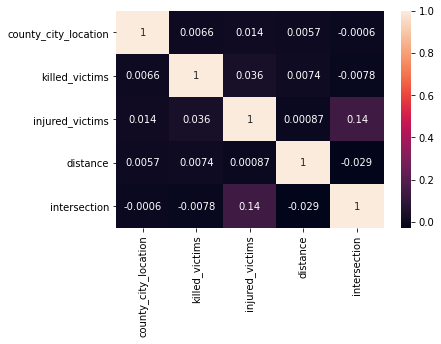

In [30]:
correlation_mat = base_collisions[['county_city_location','killed_victims','injured_victims','distance','intersection']].corr().compute()

sns.heatmap(correlation_mat, annot = True)

plt.show()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


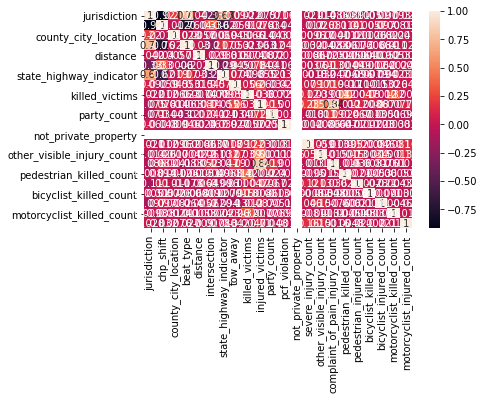

In [ ]:
correlation_mat = base_collisions_numericas.corr().compute()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
cov_base_collisions = base_collisions.cov().compute()
print("La covarianza de las variables es:")
cov_base_collisions

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


La covarianza de las variables es:


,jurisdiction,chp_shift,county_city_location,beat_type,distance,intersection,state_highway_indicator,tow_away,killed_victims,injured_victims,party_count,pcf_violation,not_private_property,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count
jurisdiction,"12,263,770.71","-5,376.62","1,002,159.31","2,500.34","1,895,321.95",-491.56,"1,061.64",157.59,7.49,-232.38,-169.14,"347,637.61",0.00,13.87,-21.54,-224.43,-1.28,-67.80,-0.31,-53.73,1.02,15.91
chp_shift,"-5,376.62",2.79,-25.96,-1.18,-871.78,0.23,-0.50,-0.05,-0.00,0.12,0.04,-134.71,0.00,-0.00,0.02,0.10,0.00,0.03,0.00,0.03,-0.00,-0.01
county_city_location,"1,002,159.31",-25.96,"1,765,259.39",28.68,"98,694.63",-0.34,12.41,30.20,0.85,16.34,-38.43,"19,773.38",0.00,2.36,9.92,4.07,0.07,-2.60,0.06,1.72,0.10,1.65
beat_type,"2,500.34",-1.18,28.68,0.86,363.01,-0.08,0.08,0.02,0.00,-0.05,-0.07,70.88,0.00,0.01,0.00,-0.06,-0.00,-0.01,-0.00,-0.01,0.00,0.00
distance,"1,895,321.95",-871.78,"98,694.63",363.01,"168,000,516.09",-158.57,206.78,96.32,9.33,9.99,-176.53,"52,059.81",0.00,20.51,39.70,-50.24,-0.27,-14.85,-0.04,-10.71,2.13,19.15
intersection,-491.56,0.23,-0.34,-0.08,-158.57,0.18,-0.06,0.01,-0.00,0.05,0.01,-46.96,0.00,0.00,0.01,0.04,-0.00,0.00,0.00,0.00,0.00,-0.00
state_highway_indicator,"1,061.64",-0.50,12.41,0.08,206.78,-0.06,0.23,0.02,0.00,-0.02,0.01,31.76,0.00,-0.00,-0.01,-0.02,-0.00,-0.01,-0.00,-0.01,0.00,0.00
tow_away,157.59,-0.05,30.20,0.02,96.32,0.01,0.02,0.25,0.00,0.11,-0.01,22.88,0.00,0.01,0.04,0.07,0.00,-0.01,-0.00,-0.01,0.00,0.00
killed_victims,7.49,-0.00,0.85,0.00,9.33,-0.00,0.00,0.00,0.01,0.00,-0.00,0.93,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
injured_victims,-232.38,0.12,16.34,-0.05,9.99,0.05,-0.02,0.11,0.00,0.78,0.09,-3.65,0.00,0.04,0.19,0.55,-0.00,0.02,-0.00,0.01,-0.00,0.02


In [ ]:
base_collisions.head(5)

,case_id,jurisdiction,officer_id,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,state_highway_indicator,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_category,pcf_violation,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,lighting,control_device,chp_road_type,not_private_property,statewide_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,collision_date,collision_time,process_date
0,0081715,"1,941.00",11342,5,7,1941,0,0,not chp,not chp,003,PATTERSON ST,ATLANTIC AV,0.00,NaN,1.00,cloudy,0.00,1.00,property damage only,0.00,0.00,2.00,vehicle code violation,speeding,"22,350.00",not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,daylight,none,0,1.00,NaN,0,0,0,0,0,0,0,0,0.00,2020-03-14,07:45:00,2020-06-22
1,0726202,"3,600.00",8945,5,5,3612,0,0,not chp,not chp,005,AMARGOSA,MARICOPA RD,0.00,NaN,nan,clear,0.00,1.00,property damage only,0.00,0.00,1.00,vehicle code violation,speeding,"22,350.00",misdemeanor,hit object,fixed object,no pedestrian involved,dry,normal,dark with street lights,none,0,1.00,passenger car,0,0,0,0,0,0,0,0,0.00,2020-07-26,02:50:00,2020-09-30
2,3493128,"9,860.00",016616,2,9,3600,0,1,interstate,chp other,151,RT 15,LYTLE CREEK WASH,120.00,north,0.00,clear,1.00,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,improper turning,"22,107.00",not hit and run,sideswipe,other motor vehicle,no pedestrian involved,dry,normal,daylight,none,1,1.00,other vehicle,0,0,0,0,0,0,0,0,0.00,2008-01-02,15:15:00,2008-08-20
3,3495044,"9,540.00",17076,1,9,1900,0,1,interstate,chp other,506,RT 5,RT 126,"1,000.00",south,0.00,clear,1.00,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,speeding,"22,350.00",not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,construction,daylight,none,1,1.00,truck or truck tractor,0,0,0,0,0,0,0,0,0.00,2008-01-02,11:30:00,2008-11-10
4,3503560,"4,316.00",15949,5,6,4316,0,0,not chp,not chp,005,RT 82,MATHILDA AV,30.00,west,0.00,clear,1.00,0.00,property damage only,0.00,0.00,2.00,vehicle code violation,automobile right of way,"21,804.00",not hit and run,broadside,other motor vehicle,no pedestrian involved,dry,normal,daylight,functioning,0,1.00,passenger car,0,0,0,0,0,0,0,0,0.00,2008-01-07,08:36:00,2008-09-23


## Comportamineto de accidentalidad por año

In [31]:
base_collisions['collision_date'] = dd.to_datetime(base_collisions['collision_date'])
muertes_año = base_collisions.groupby(base_collisions['collision_date'].dt.to_period('y')).killed_victims.sum()

In [32]:
muertes_año.compute()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


collision_date
2008   3,401.00
2020   1,883.00
2009   3,076.00
2010   2,739.00
2011   2,835.00
2012   2,995.00
2013   3,104.00
2014   3,126.00
2015   3,437.00
2016   3,860.00
2017   3,904.00
2018   3,805.00
2019   3,674.00
2002   4,089.00
2001   3,926.00
2003   4,225.00
2004   4,094.00
2005   4,304.00
2006   4,002.00
2007   3,967.00
Freq: A-DEC, Name: killed_victims, dtype: float64

In [ ]:
muertes_año.to_csv('muertes_año.csv')

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


['/content/drive/Shareddrives/Big data/muertes_año.csv/0.part']

In [33]:
muertes = pd.read_csv('muertes_año2.csv',sep=';')

In [34]:
#creating dataframe with date and the target variable

muertes['fecha'] = pd.to_datetime(muertes['collision_date'],format='%Y')
muertes.index = muertes['fecha']
# df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(muertes[['fecha', 'killed_victims']])
#
#setting index
data.index = data.fecha
data.drop('fecha', axis=1, inplace=True)
data.head()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")

No handles with labels found to put in legend.


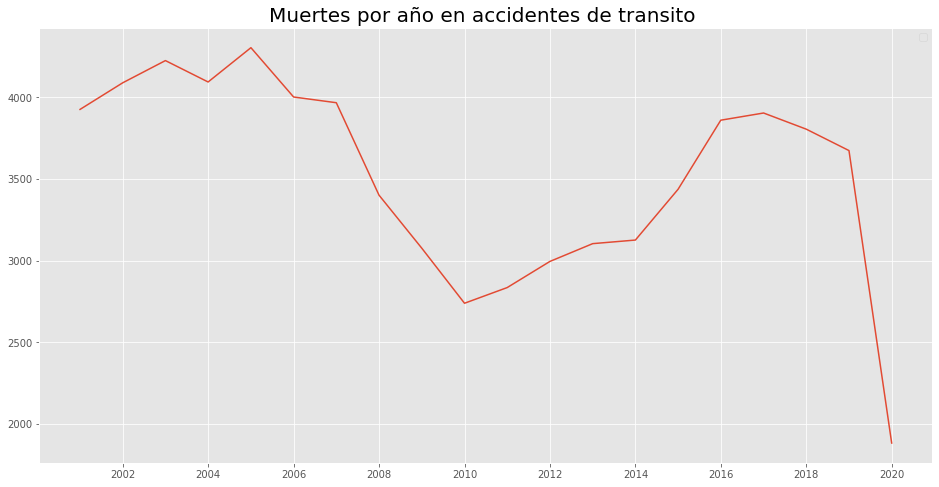

In [35]:
plt.figure(figsize=(16,8))
#plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (85%)'.format(len_train))
plt.plot(data['killed_victims'])#[len_train:], label='Conjunto de validación (Validation set): {} puntos (15%)'.format(len_test)) #248 data
plt.title("Muertes por año en accidentes de transito ", size = 20)
plt.legend()
plt.show()

Al observar las muertes por colisiones en el estado de California durante los años 2001 hasta 2007 se ve un comportamiento bastante elevado en los accidentes con muerte, sin mebargo durante los años 2018 a 2014 vemos una disminucion considerable y luego un repunte entre 2015 a 2019. 

In [40]:
base_collisions['collision_date'] = dd.to_datetime(base_collisions['collision_date'])
heridos_año = base_collisions.groupby(base_collisions['collision_date'].dt.to_period('y')).injured_victims.sum()

In [ ]:
heridos_año.compute()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


collision_date
2008   241,873.00
2020   133,131.00
2009   232,777.00
2010   229,354.00
2011   225,602.00
2012   226,544.00
2013   223,128.00
2014   230,904.00
2015   254,704.00
2016   280,039.00
2017   277,164.00
2018   274,861.00
2019   268,463.00
2002   310,688.00
2001   305,907.00
2003   307,165.00
2004   302,357.00
2005   292,798.00
2006   266,135.00
2007   266,687.00
Freq: A-DEC, Name: injured_victims, dtype: float64

In [ ]:
heridos_año.to_csv('heridos_año.csv')

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


['/content/drive/Shareddrives/Big data/heridos_año.csv/0.part']

In [41]:
heridos = pd.read_csv('heridos_año2.csv',sep=';')

In [42]:
#creating dataframe with date and the target variable

heridos['fecha'] = pd.to_datetime(heridos['collision_date'],format='%Y')
heridos.index = heridos['fecha']
# df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(heridos[['fecha', 'injured_victims']])
#
#setting index
data.index = data.fecha
data.drop('fecha', axis=1, inplace=True)
data.head()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")

No handles with labels found to put in legend.


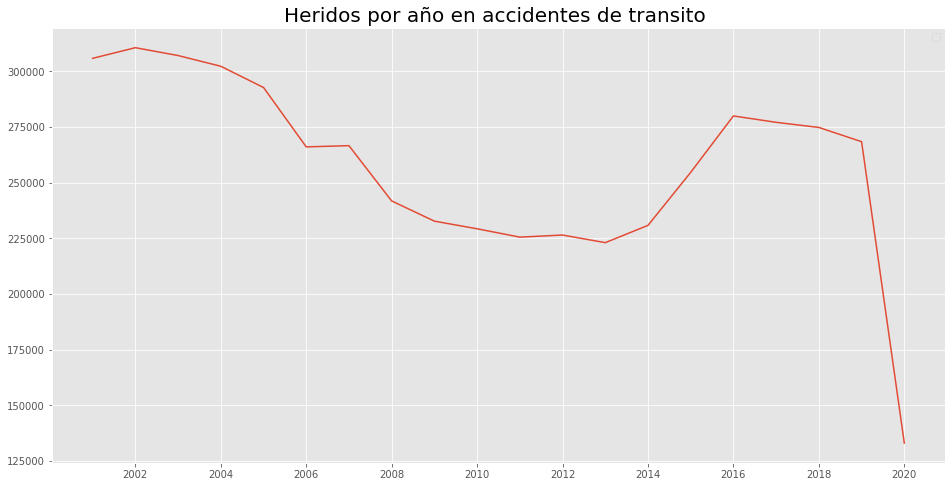

In [43]:
plt.figure(figsize=(16,8))
#plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (85%)'.format(len_train))
plt.plot(data['injured_victims'])#[len_train:], label='Conjunto de validación (Validation set): {} puntos (15%)'.format(len_test)) #248 data
plt.title("Heridos por año en accidentes de transito ", size = 20)
plt.legend()
plt.show()

Al observar los heridos por colisiones en el estado de California durante los años 2001 hasta 2005 se ve un comportamiento bastante elevado en los accidentes con herido, sin mebargo durante los años 2006 a 2014 vemos una disminucion considerable y luego un repunte entre 2014 a 2019. 

Es importante mencionar que el comportamiento tanto en la grafica de heridos como de muertes, se pudo dar a cambios en las politicas tanto de movilidad como de orden publico, pues es muy atipico cambios tan abruptos en la accidentalidad. 

# Realización del modelo

En esta sección se realiza la prepacion de los datos y la posterior construcción del modelo.

## Preparación de datos

In [44]:
df['collision_date'] = dd.to_datetime(df['collision_date'])
monthly_orders = df.groupby(df['collision_date'].dt.to_period('D')).size()
#monthly_orders.plot.line(figsize=(20,10))

In [ ]:
monthly_t=monthly_orders.compute()

/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2,21,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [ ]:
sum(monthly_t)

9172565

In [ ]:
monthly_t

collision_date
2008-01-01     885
2008-01-02    1104
2008-01-03    1137
2008-01-04    1646
2008-01-05    1235
              ... 
2007-12-27    1092
2007-12-28    1194
2007-12-29     972
2007-12-30     819
2007-12-31    1061
Freq: D, Length: 7235, dtype: int64

In [ ]:
monthly_t.to_csv('collisions_serie.csv') 

In [45]:
df = pd.read_csv('collisions_serie2.csv',sep=';')

In [46]:
df.head()

,fecha,collisiones
0,1/01/2001,1000
1,2/01/2001,1330
2,3/01/2001,1329
3,4/01/2001,1346
4,5/01/2001,1457


In [47]:
#creating dataframe with date and the target variable

df['fecha'] = pd.to_datetime(df.fecha,format='%d/%m/%Y')
df.index = df['fecha']
# df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(df[['fecha', 'collisiones']])
#
#setting index
data.index = data.fecha
data.drop('fecha', axis=1, inplace=True)
data.head()

,collisiones
fecha,
2001-01-01,1000
2001-01-02,1330
2001-01-03,1329
2001-01-04,1346
2001-01-05,1457


# Visualización de la serie 

In [48]:
# plot
len_data = len(data)
len_train = int(len_data*0.85) # 80%  = 5788
len_test = len_data- len_train # 20% = 1447
print (len_data, '=', len_train, '+',len_test)

7235 = 6149 + 1086


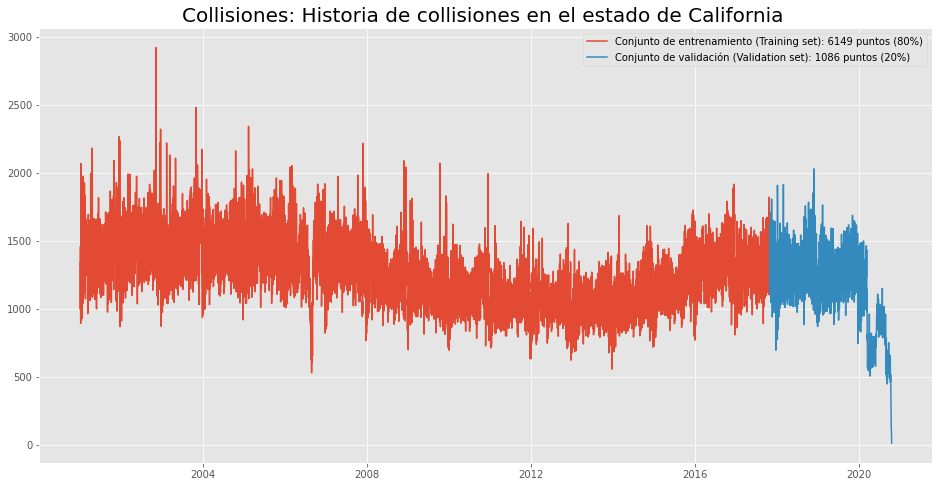

In [49]:
plt.figure(figsize=(16,8))
plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(data['collisiones'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) #248 data
plt.title("Collisiones: Historia de collisiones en el estado de California ", size = 20)
plt.legend()
plt.show()

En esta grafica se presenta la serie de tiempo que será modelada por medio de metodos de deep learning

# Modelo LSTM a una capa

## Preparación de los datos para el entrenamiento de la red LSTM

In [50]:
#
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

Versión de Tensorflow:  2.5.0


In [52]:
#creating train and test sets
dataset = data.values
# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [53]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)

In [54]:
tf.random.set_seed(100)

In [56]:
#
# hiperparámetros para crear las secuencias
past_history = 35 # tamaño secuencias de entrada
future_target = 1 # días adelante
TRAIN_SPLIT = int(len_data*0.85) #5788: nuḿer0 de datos entreno

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, 0, TRAIN_SPLIT,
                                           past_history,
                                           future_target)
#
#secuencias de validación
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT, None,
                                       past_history,
                                       future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

6149
(6114, 35, 1)
(6114,)
(1050, 35, 1)
(1050,)


In [57]:
print ('Ventana  de la historia pasada')
print (X_train[1])
print ('\n promedio de colisiones al dia ')
print (y_train[1])

Ventana  de la historia pasada
[[0.45335628]
 [0.45301205]
 [0.45886403]
 [0.49707401]
 [0.37487091]
 [0.30292599]
 [0.7070568 ]
 [0.50120482]
 [0.69604131]
 [0.64234079]
 [0.60447504]
 [0.416179  ]
 [0.31359725]
 [0.38967298]
 [0.52943201]
 [0.44406196]
 [0.43580034]
 [0.47332186]
 [0.38967298]
 [0.31497418]
 [0.44853701]
 [0.5253012 ]
 [0.60550775]
 [0.53528399]
 [0.67504303]
 [0.42444062]
 [0.35387263]
 [0.45025818]
 [0.44371773]
 [0.45232358]
 [0.44888124]
 [0.52392427]
 [0.46092943]
 [0.38003442]
 [0.51325301]]

 promedio de colisiones al dia 
0.48433734939759043


## Crea el modelo LSTM

In [59]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 45 # no tengo idea que significa

# layers
inputs = Input(input_shape)
x = Dropout(0.0, name= 'Dropout_01')(inputs) # colocar dropout en las capas
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs) # experimentar con una segunda capa
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
#x = Dropout(0.0, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()


Model: "series_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 35, 1)]           0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 35, 1)             0         
_________________________________________________________________
LSTM_layer (LSTM)            (None, 45)                8460      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 46        
Total params: 8,506
Trainable params: 8,506
Non-trainable params: 0
_________________________________________________________________


## Compila

In [60]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.0001))

## Entrenar el modelo

In [61]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=10,       #como cuadrar este parametro # guardar el modelo para reentrenar
    batch_size=1,    #como cuadrar este parametro # 32
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/10
5502/5502 [==============================] - 58s 10ms/step - loss: 0.0089 - val_loss: 0.0032
Epoch 2/10
5502/5502 [==============================] - 55s 10ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 3/10
5502/5502 [==============================] - 57s 10ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 4/10
5502/5502 [==============================] - 60s 11ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 5/10
5502/5502 [==============================] - 58s 11ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 6/10
5502/5502 [==============================] - 58s 11ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 7/10
5502/5502 [==============================] - 56s 10ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 8/10
5502/5502 [==============================] - 56s 10ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 9/10
5502/5502 [==============================] - 56s 10ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 10/10
5502/5502 [==============================] - 56s 10m

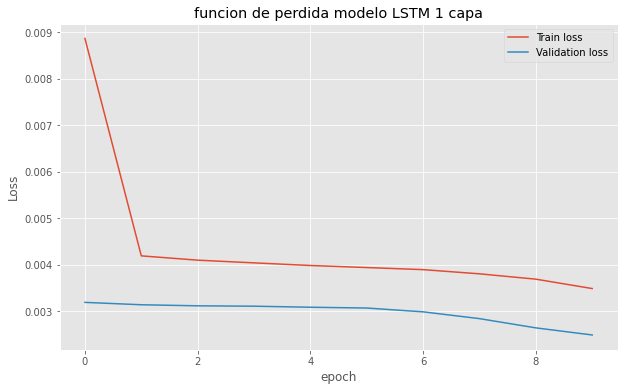

In [62]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('funcion de perdida modelo LSTM 1 capa')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

## Predicciones

In [63]:
X_test.shape

(1050, 35, 1)

## Calculo de predicciones

In [64]:
# predictions
prediction = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

In [65]:
print(prediction.shape)
print(y_test.shape)

(1050, 1)
(1050,)


## Eliminar dimensiones sobrantes

In [66]:
y_train_p = y_train #np.squeeze(y_train, axis=-1)
y_test_p = y_test#np.squeeze(y_test, axis=-1)
y_pred_p = np.squeeze(prediction, axis=-1)

In [67]:
print(y_train_p.shape)
print(y_test_p.shape)
print(y_pred_p.shape)

k=0
for i,j in zip(y_test_p, y_pred_p):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(6114,)
(1050,)
(1050,)
0.5500860585197934 0.43384862 0.11623743905873385
0.442685025817556 0.4155503 0.027134734279317452
0.3304647160068847 0.4193841 -0.08891937608562933
0.4729776247848537 0.45128122 0.02169640506401327
0.5218588640275387 0.4918728 0.029986076551952734
0.5208261617900172 0.50193644 0.018889726090554282
0.5208261617900172 0.47331613 0.04751002876770882
0.5611015490533563 0.42884606 0.13225548782365049
0.42547332185886405 0.39875233 0.026720990125160438
0.3807228915662651 0.40334633 -0.02262343836117936


## Grafica de predicciones

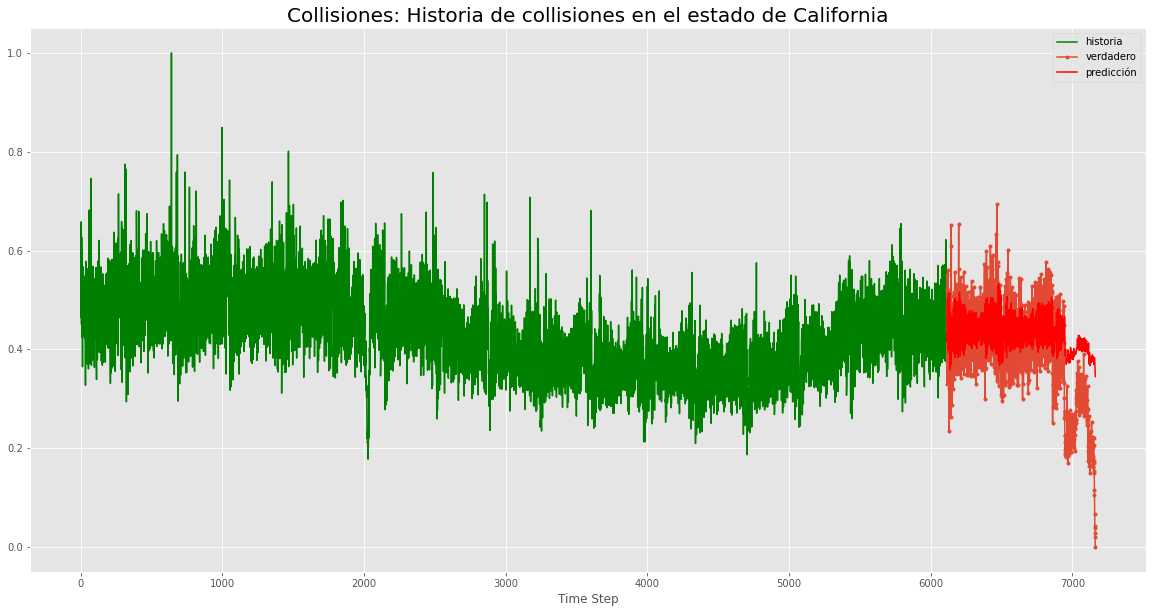

In [68]:
plt.plot(np.arange(0, len(y_train_p)), y_train_p, 'g', label="historia")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_test_p, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_pred_p, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Collisiones: Historia de collisiones en el estado de California", size = 20)
plt.legend()
plt.show();

## Indices de ajuste

In [69]:
y_pred_or = scaler.inverse_transform(y_pred_p.reshape(-1,1))
y_test_or = scaler.inverse_transform(y_test_p.reshape(-1,1))

In [70]:
k=0
for i,j in zip(y_test_or, y_pred_or):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[1611.] [1273.3303] [337.66967773]
[1299.] [1220.1736] [78.82641602]
[973.] [1231.3108] [-258.31079102]
[1387.] [1323.9719] [63.02807617]
[1529.] [1441.8905] [87.10949707]
[1526.] [1471.1254] [54.87463379]
[1526.] [1387.9834] [138.01660156]
[1643.] [1258.7979] [384.20214844]
[1249.] [1171.3756] [77.62438965]
[1119.] [1184.7211] [-65.72106934]


In [71]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or-y_test_or,2)))
rmsLSTM2 = np.mean(abs(y_pred_or-y_test_or))
print(rmsLSTM )
print(rmsLSTM2 )

256.9027878752409
186.517278297061


In [72]:
# MSE, MAE, R2, RMSE Método uno
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer
print(mean_squared_error(y_test_or,y_pred_or))
print(mean_absolute_error(y_test_or,y_pred_or))
print(np.sqrt(mean_squared_error(y_test_or,y_pred_or)))  # RMSE
print(r2_score(y_test_or,y_pred_or))

65999.04241807101
186.517278297061
256.9027878752409
0.2538709537399988


## Grafica datos Reales vs Predicción

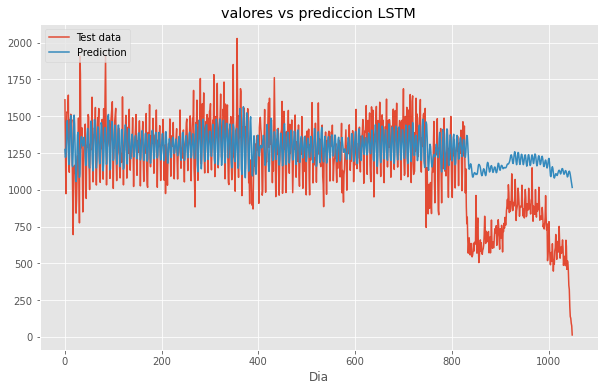

In [73]:
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test data'.format(y_test))
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction'.format(prediction))
    plt.title('valores vs prediccion ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Dia')
    plt.ylabel('')
 
plot_future(y_pred_or, 'LSTM', y_test_or)

# Modelo LSTM a dos capas



## Preparación de los datos para el entrenamiento de la red LSTM

In [81]:
#
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)
plt.style.use('ggplot')

Versión de Tensorflow:  2.5.0


In [82]:
#creating train and test sets
dataset = data.values
# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [83]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)


In [84]:
tf.random.set_seed(101)

In [85]:
#
# hiperparámetros para crear las secuencias
past_history = 30 # tamaño secuencias de entrada
future_target = 1 # días adelante
TRAIN_SPLIT = int(len_data*0.8) #5788: nuḿer0 de datos entreno

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, 0, TRAIN_SPLIT,
                                           past_history,
                                           future_target)
#
#secuencias de validación
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT, None,
                                       past_history,
                                       future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

5788
(5758, 30, 1)
(5758,)
(1416, 30, 1)
(1416,)


In [86]:
print ('Ventana  de la historia pasada')
print (X_train[1])
print ('\n promedio de colisiones al dia ')
print (y_train[1])

Ventana  de la historia pasada
[[0.45335628]
 [0.45301205]
 [0.45886403]
 [0.49707401]
 [0.37487091]
 [0.30292599]
 [0.7070568 ]
 [0.50120482]
 [0.69604131]
 [0.64234079]
 [0.60447504]
 [0.416179  ]
 [0.31359725]
 [0.38967298]
 [0.52943201]
 [0.44406196]
 [0.43580034]
 [0.47332186]
 [0.38967298]
 [0.31497418]
 [0.44853701]
 [0.5253012 ]
 [0.60550775]
 [0.53528399]
 [0.67504303]
 [0.42444062]
 [0.35387263]
 [0.45025818]
 [0.44371773]
 [0.45232358]]

 promedio de colisiones al dia 
0.5239242685025818


## Crear el Modelo LSTM

In [87]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50 # no tengo idea que significa

# layers
inputs = Input(input_shape)
#x = Dropout(0.00, name= 'Dropout_01')(inputs) # colocar dropout en las capas
#x = LSTM(units=units, name='LSTM_layer')(x)
x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs) # experimentar con una segunda capa
x = Dropout(0.0)(x)
x = LSTM(units=units, name='LSTM_layer_2')(x)
x = Dropout(0.0)(x)
#x = Dropout(0.4, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()


Model: "series_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
LSTM_layer (LSTM)            (None, 30, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
LSTM_layer_2 (LSTM)          (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_____________________________________________

## Compila

In [88]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.0001))

## Entrenar el modelo

In [89]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=10,       #como cuadrar este parametro # guardar el modelo para reentrenar
    batch_size=1,    #como cuadrar este parametro # 32
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/10
5182/5182 [==============================] - 88s 16ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 2/10
5182/5182 [==============================] - 84s 16ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 3/10
5182/5182 [==============================] - 83s 16ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 4/10
5182/5182 [==============================] - 83s 16ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/10
5182/5182 [==============================] - 83s 16ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/10
5182/5182 [==============================] - 84s 16ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/10
5182/5182 [==============================] - 85s 16ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/10
5182/5182 [==============================] - 84s 16ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/10
5182/5182 [==============================] - 85s 16ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 10/10
5182/5182 [==============================] - 85s 16m

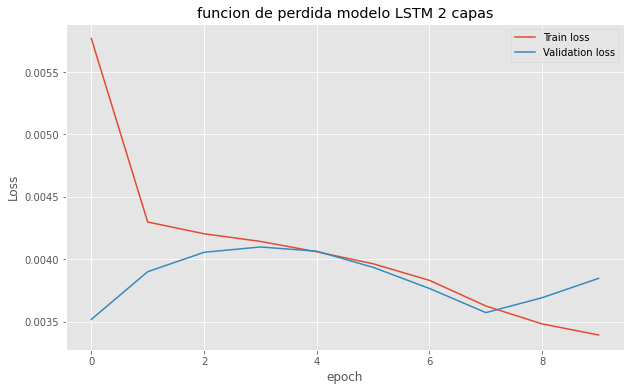

In [90]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('funcion de perdida modelo LSTM 2 capas')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

## Predicciones

In [91]:
X_test.shape

(1416, 30, 1)

## Calculo de predicciones

In [92]:
# predictions
prediction = model_01.predict(X_test)
#prediction = scaler.inverse_transform(predictio

In [93]:
print(prediction.shape)
print(y_test.shape)

(1416, 1)
(1416,)


## Eliminar dimensiones sobrantes

In [94]:
y_train_p = y_train #np.squeeze(y_train, axis=-1)
y_test_p = y_test#np.squeeze(y_test, axis=-1)
y_pred_p = np.squeeze(prediction, axis=-1)

In [96]:
print(y_train_p.shape)
print(y_test_p.shape)
print(y_pred_p.shape)

k=0
for i,j in zip(y_test_p, y_pred_p):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(5758,)
(1416,)
(1416,)
0.4998278829604131 0.43570796 0.06411992640790759
0.6450946643717728 0.4112394 0.23385527876691437
0.5755593803786575 0.38554958 0.19000980528824918
0.4967297762478486 0.3719285 0.12480126319776924
0.35490533562822724 0.38070992 -0.02580458072499847
0.4705679862306369 0.41657913 0.05398885891893035
0.4764199655765921 0.44898614 0.02743382270282807
0.5018932874354561 0.45910633 0.04278696133224569
0.6044750430292599 0.43629855 0.16817649385399747
0.6547332185886403 0.40255532 0.25217790190201006


## Grafica de predicciones

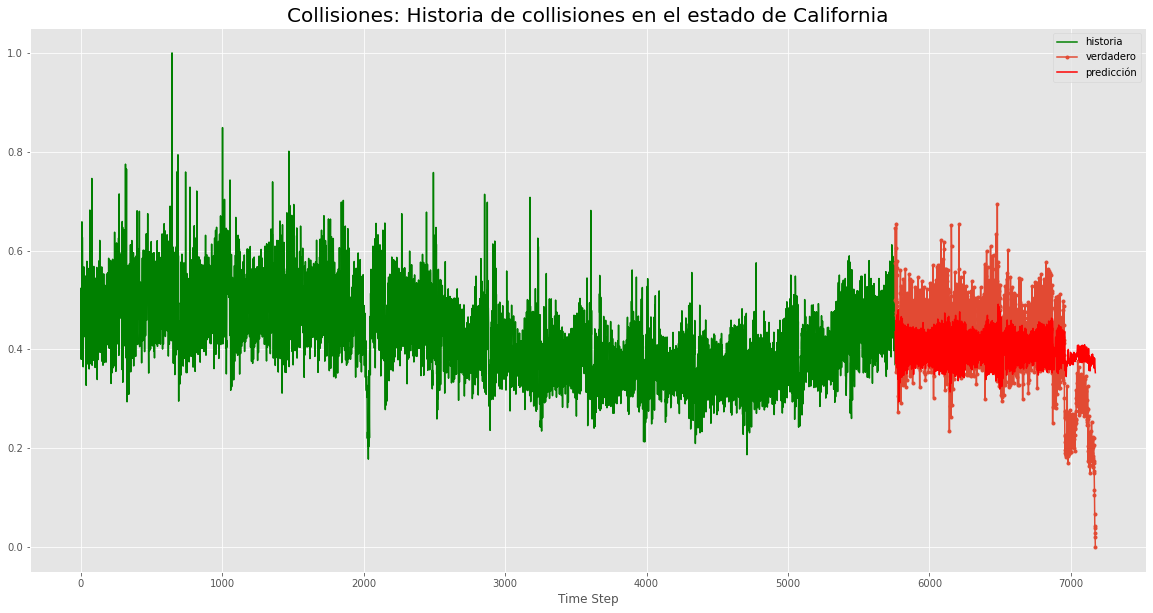

In [97]:
plt.plot(np.arange(0, len(y_train_p)), y_train_p, 'g', label="historia")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_test_p, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_pred_p, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Collisiones: Historia de collisiones en el estado de California", size = 20)
plt.legend()
plt.show();

## Indices de ajuste

In [98]:
y_pred_or = scaler.inverse_transform(y_pred_p.reshape(-1,1))
y_test_or = scaler.inverse_transform(y_test_p.reshape(-1,1))

In [99]:
k=0
for i,j in zip(y_test_or, y_pred_or):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[1465.] [1278.7317] [186.26831055]
[1887.] [1207.6505] [679.3494873]
[1685.] [1133.0216] [551.97839355]
[1456.] [1093.4524] [362.54760742]
[1044.] [1118.9624] [-74.96240234]
[1380.] [1223.1624] [156.83764648]
[1397.] [1317.3048] [79.69519043]
[1471.] [1346.7039] [124.29614258]
[1769.] [1280.4473] [488.55273438]
[1915.] [1182.4232] [732.57678223]


In [100]:
# MSE, MAE, R2, RMSE Método uno
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #transfer
print(mean_squared_error(y_test_or,y_pred_or))
print(mean_absolute_error(y_test_or,y_pred_or))
print(np.sqrt(mean_squared_error(y_test_or,y_pred_or)))  # RMSE
print(r2_score(y_test_or,y_pred_or))

62131.61353718496
192.0072699078059
249.26213819428125
0.2163530145821838


## Grafica datos Reales vs Predicción



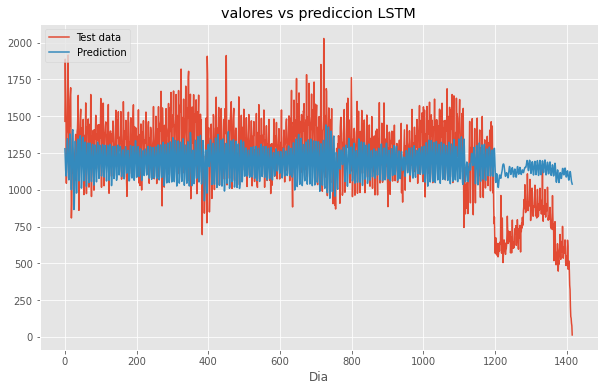

In [101]:
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test data'.format(y_test))
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction'.format(prediction))
    plt.title('valores vs prediccion ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Dia')
    plt.ylabel('')
 
plot_future(y_pred_or, 'LSTM', y_test_or)

# Modelo GRU y Modelo Bidireccional

## Preparación de los datos para el entrenamiento de la red LSTM

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [119]:
tf.random.set_seed(1234)
df=data

In [120]:
# Divida los datos del tren y los datos de prueba
train_size = int (len(df) * 0.85) 
train_data = df.iloc [: train_size] 
test_data = df.iloc [train_size:]

In [121]:
scaler = MinMaxScaler (). fit (train_data) 
train_scaled = scaler.transform (train_data) 
test_scaled = scaler.transform (test_data)

In [122]:
# Crear conjunto de datos de entrada
def create_dataset (X, look_back = 1): 
    Xs, ys = [], [] 
 
    for i in range (len (X) -look_back): 
        v = X [i: i + look_back] 
        Xs.append ( v) 
        ys.append (X [i + look_back]) 
 
    return np.array (Xs), np.array (ys)
LOOK_BACK = 30
X_train, y_train = create_dataset (train_scaled, LOOK_BACK) 
X_test, y_test = create_dataset (test_scaled, LOOK_BACK)
# Imprimir forma de datos
print ('X_train.shape:', X_train.shape) 
print ('y_train.shape:', y_train.shape) 
print ('X_test.shape:', X_test.shape) 
print ('y_test.shape: ', y_test.shape)


X_train.shape: (6119, 30, 1)
y_train.shape: (6119, 1)
X_test.shape: (1056, 30, 1)
y_test.shape:  (1056, 1)


## Crear modelo LSTM BI Y GRU

In [123]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [124]:
model_bilstm.summary()
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 30, 128)           33792     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 132,737
Trainable params: 132,737
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30, 64)            12864     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 64)            0         
__________________________

In [125]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 10,  
                        validation_split = 0.1,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/10
345/345 [==============================] - 17s 37ms/step - loss: 0.0083 - val_loss: 0.0049
Epoch 2/10
345/345 [==============================] - 13s 36ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 3/10
345/345 [==============================] - 12s 35ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 4/10
345/345 [==============================] - 12s 33ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 5/10
345/345 [==============================] - 12s 34ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 6/10
345/345 [==============================] - 11s 33ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 7/10
345/345 [==============================] - 12s 34ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 8/10
345/345 [==============================] - 12s 34ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 9/10
345/345 [==============================] - 12s 34ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 10/10
345/345 [==============================] - 12s 34ms/step - loss: 0.003

In [126]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

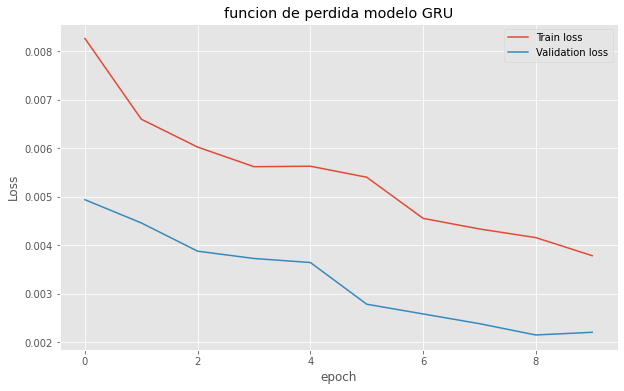

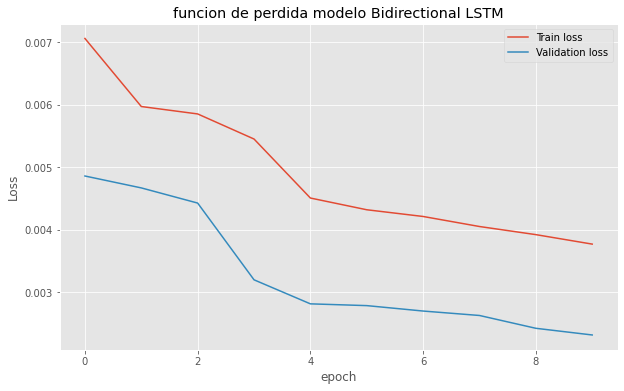

In [127]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('funcion de perdida modelo ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    #plt.legend( loc='upper right')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

## Indicadores de ajuste

In [128]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

In [129]:
# MSE, MAE, R2, RMSE Método uno
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2

print(mean_squared_error(y_test,prediction_gru))
print(mean_absolute_error(y_test,prediction_gru))
print(np.sqrt(mean_squared_error(y_test,prediction_gru)))  # RMSE
print(r2_score(y_test,prediction_gru))

32314.835797087686
132.46374136028868
179.76327710933535
0.6344997501320391


In [130]:
print(mean_squared_error(y_test,prediction_bilstm))
print(mean_absolute_error(y_test,prediction_bilstm))
print(np.sqrt(mean_squared_error(y_test,prediction_bilstm)))  # RMSE
print(r2_score(y_test,prediction_bilstm))

26168.852292165164
124.28721058007443
161.7678963582242
0.7040145241150775


## Grafica datos Reales vs Predicción

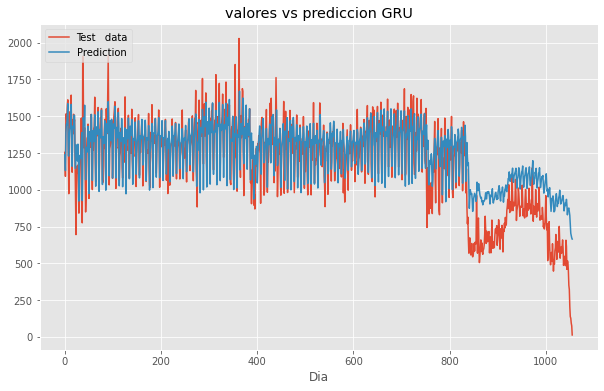

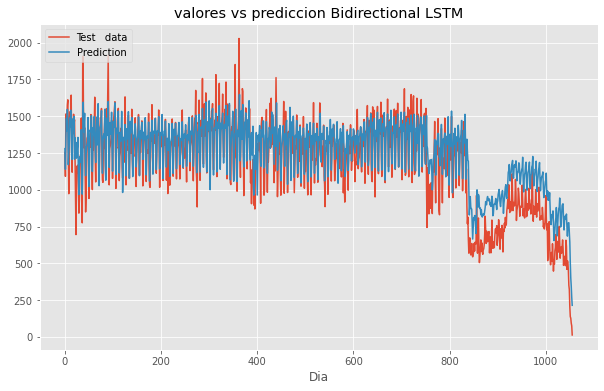

In [131]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('valores vs prediccion ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Dia')
    plt.ylabel('')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)